# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
#city_data_to_load = "city_data.csv"
#ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")


In [ ]:

city_data_df.head()


### Merge the DataFrames

In [ ]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left",on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [ ]:
#  1. Get the total rides for each city type 
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

In [ ]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

In [ ]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

In [ ]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares/total_rides
avg_fare_per_ride

In [ ]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares/total_drivers
avg_fare_per_driver

In [ ]:
#  6. Create a PyBer summary DataFrame. 
# Combine the datasets into one dataframe
index_labels = ["Rural","Suburban","Urban"]
total_rides.index = index_labels
total_drivers.index = index_labels

pyber_summary_df = pd.concat({'Total Rides':total_rides,
                              'Total Drivers':total_drivers,
                              'Total Fares':total_fares,
                            'Average Fare per Ride':avg_fare_per_ride,
                             'Average fare per Driver': avg_fare_per_driver},axis=1)
pyber_summary_df.index.name = "type"
#Display the dataframe
pyber_summary_df.head()

In [ ]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
#Display the dataframe
pyber_summary_df.head()

In [ ]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df.head()

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# Print the merged DataFrame for reference.
pyber_data_df.head()

In [ ]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
faresby_city_date_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
faresby_city_date_df.head()

In [ ]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
faresby_city_date_df = faresby_city_date_df.reset_index()
faresby_city_date_df.head()

In [ ]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
faresby_city_date_df = faresby_city_date_df.pivot(index='date', columns='type', values='fare')
faresby_city_date_df.describe()

In [ ]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

faresby_city_date_df = faresby_city_date_df.loc['2019-01-01':'2019-04-29']
faresby_city_date_df.info()

In [ ]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

faresby_city_date_df.index = pd.to_datetime(faresby_city_date_df.index)

faresby_city_date_df.head()



In [ ]:
# 6. Check that the datatype for the index is datetime using df.info()
faresby_city_date_df.info()

In [26]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
faresby_city_date_df = faresby_city_date_df.resample('W').sum()
faresby_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [ ]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
drivers_data = [urban_drivers, suburban_drivers,rural_drivers]
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [ ]:
rural_data = faresby_city_date_df["Rural"]
rural_data

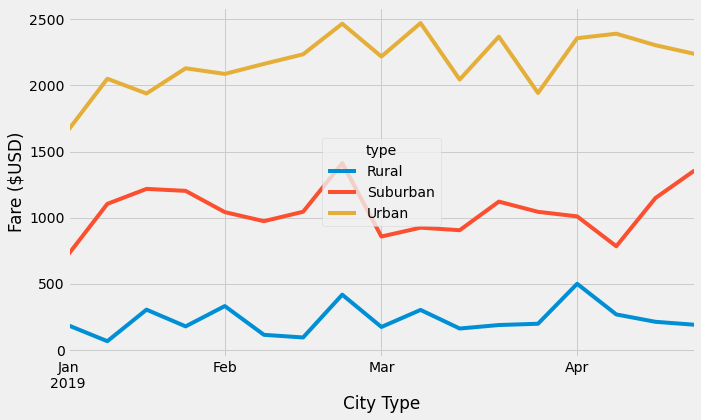

In [52]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

import matplotlib.pyplot as plt

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

weekly_fares = faresby_city_date_df.plot(figsize=(10,6))

weekly_fares.set_xlabel("City Type")
weekly_fares.set_ylabel("Fare ($USD)")

#x_labels={"Rural","Suburban","Urban"}
#fig,ax = plt.subplots(figsize=(10,6))


#faresby_city_date_df.plot(kind='line', x=['date'],y=['Rural'],labels=x_labels,ax=ax)


fig = plt.savefig("PyBer_fare_summary.png")
plt.show()